In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv('park_train_data.txt', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,158.591,63,60,0.007766,0.001066,24.194,2,15.113,1,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,143.797,47,44,0.007561,0.000430,46.053,1,25.792,1,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,149.641,79,77,0.007767,0.000881,20.000,1,4.574,1,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,451.366,75,70,0.007257,0.001714,16.667,3,19.575,1,0


In [2]:
# Import data and preprocessing
data = pd.read_csv('classificationdata.csv', names = ['Subject id', 'Jitter local', 'Jitter local absolute', 'Jitter rap', 'Jitter ppq5', 'Jitter ddp', 'Shimmer local', 'Shimmer local dB', 'Shimmer apq3', 'Shimmer apq5', 'Shimmer apq11', 'Shimmer dda', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks','UPDRS', 'class information'])

data

,Subject id,Jitter local,Jitter local absolute,Jitter rap,Jitter ppq5,Jitter ddp,Shimmer local,Shimmer local dB,Shimmer apq3,Shimmer apq5,...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,158.591,63,60,0.007766,0.001066,24.194,2,15.113,1,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,143.797,47,44,0.007561,0.000430,46.053,1,25.792,1,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,149.641,79,77,0.007767,0.000881,20.000,1,4.574,1,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,451.366,75,70,0.007257,0.001714,16.667,3,19.575,1,0


In [8]:
# Import data and preprocessing
data = pd.read_csv('classificationdata.csv', names = ['Subject id', 'Jitter local', 'Jitter local absolute', 'Jitter rap', 'Jitter ppq5', 'Jitter ddp', 'Shimmer local', 'Shimmer local dB', 'Shimmer apq3', 'Shimmer apq5', 'Shimmer apq11', 'Shimmer dda', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks','UPDRS', 'class information'])

data = data.drop(['Subject id', 'UPDRS'], axis = 1) #  col 1 - person id and col 27 - UPDRS column
# data = data.sample(frac=1).reset_index(drop = True) # shuffle the rows and reset index
# Select appropriate columns for X and y
y = data.iloc[:,-1]
X_raw = data.iloc[:,:-1]
# Scale all feature columns between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X_raw)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
data

,Jitter local,Jitter local absolute,Jitter rap,Jitter ppq5,Jitter ddp,Shimmer local,Shimmer local dB,Shimmer apq3,Shimmer apq5,Shimmer apq11,...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,class information
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,8.303,...,96.145,158.591,63,60,0.007766,0.001066,24.194,2,15.113,0
1036,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,11.928,...,121.490,143.797,47,44,0.007561,0.000430,46.053,1,25.792,0
1037,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,14.239,...,95.921,149.641,79,77,0.007767,0.000881,20.000,1,4.574,0
1038,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,18.818,...,90.051,451.366,75,70,0.007257,0.001714,16.667,3,19.575,0


In [503]:
model = keras.models.Sequential([
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
    ])
#sgd = keras.optimizers.SGD(learning_rate = 0.01, momentum = 0)
adam = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy", "Recall", 'Precision', 'AUC'])

# Single Model fit
history = model.fit(X_train, y_train.values, epochs = 300  , validation_split = 0.4, verbose = 0)

In [504]:
# Evaluate model on training set and test set
test = model.evaluate(X_test,y_test.values, verbose = 0)
train = model.evaluate(X_train, y_train.values, verbose = 0)
print("Test set:\nAccuracy =",round(test[1],3), "\nLoss =", round(test[0], 3),'\nRecall =', round(test[2], 3),'\nPrecision =', round(test[3], 3), '\nAUC =', round(test[4], 3), '\n')
print("Training set:\nAccuracy =", round(train[1], 3), "\nLoss =", round(train[0], 3), '\nRecall =', round(train[2], 3),'\nPrecision =', round(train[3], 3),'\nAUC =', round(train[4], 3))

Test set:
Accuracy = 0.651 
Loss = 0.631 
Recall = 0.745 
Precision = 0.641 
AUC = 0.704 

Training set:
Accuracy = 0.686 
Loss = 0.572 
Recall = 0.826 
Precision = 0.637 
AUC = 0.763


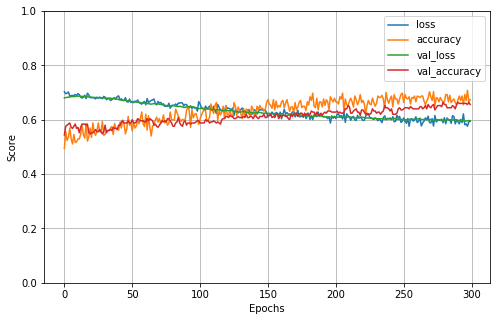

In [505]:
all_results = history.history
compact_results = dict((k, all_results[k]) for k in ('loss', 'accuracy', 'val_loss', 'val_accuracy'))


pd.DataFrame(compact_results).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel(xlabel ="Epochs")
plt.ylabel(ylabel ="Score")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [506]:
predict = model.predict_classes(X_test)
confusion_matrix(y_test, predict)

array([[110,  90],
       [ 55, 161]], dtype=int64)